In [14]:
import kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database
Dataset path: /kaggle/input/pima-indians-diabetes-database


In [30]:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
save_path = "/content/drive/MyDrive/pimaeda"
os.makedirs(save_path, exist_ok=True)

In [15]:
import pandas as pd
data = pd.read_csv(path + "/diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = data.copy()
features = df.columns[:-1]

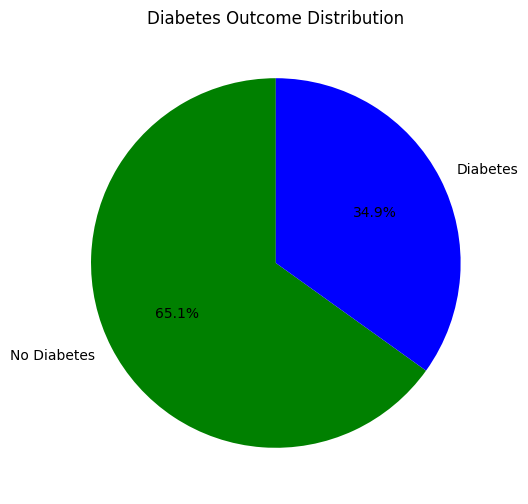

In [18]:
# diabetes outcome
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['No Diabetes', 'Diabetes'],
    startangle=90, colors=['green', 'blue']
)
plt.title("Diabetes Outcome Distribution")
plt.ylabel('')
plt.savefig(f"{save_path}/01_outcome_distribution.svg")
plt.show()

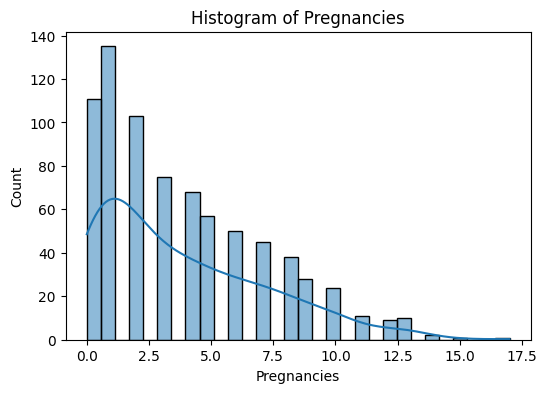

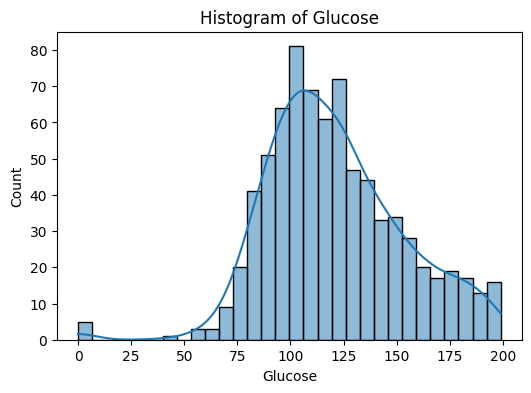

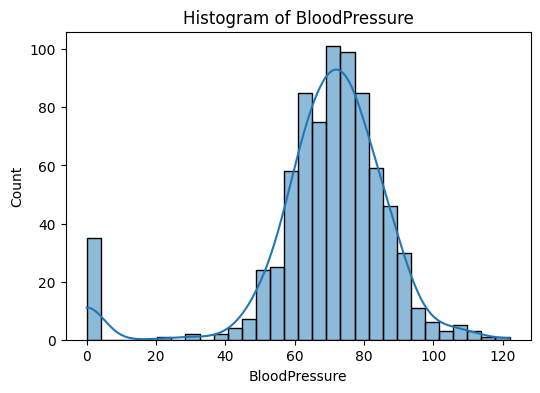

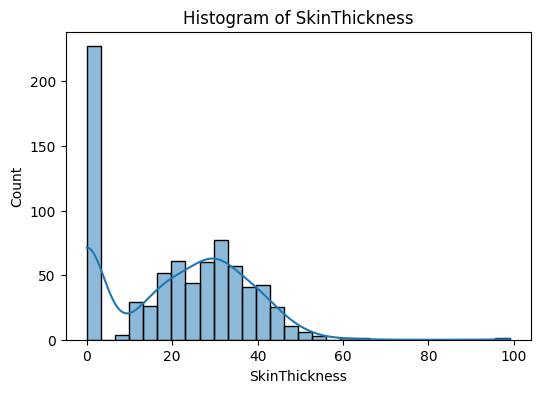

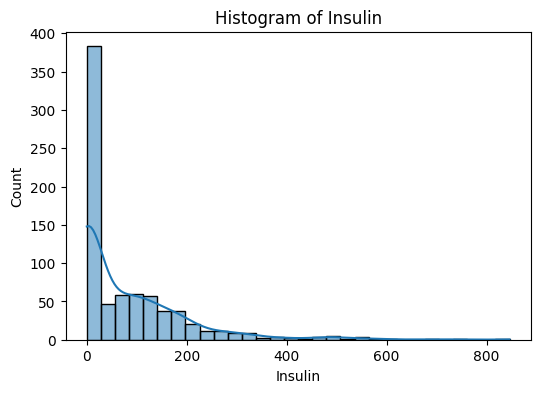

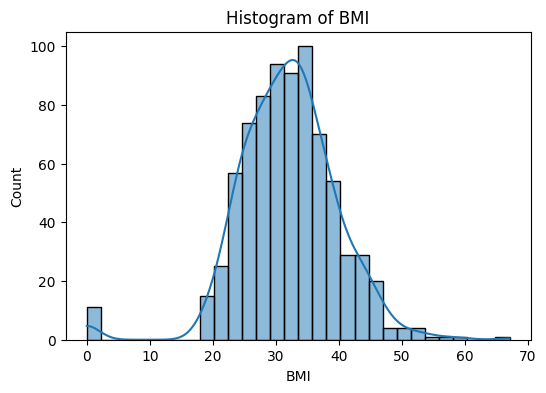

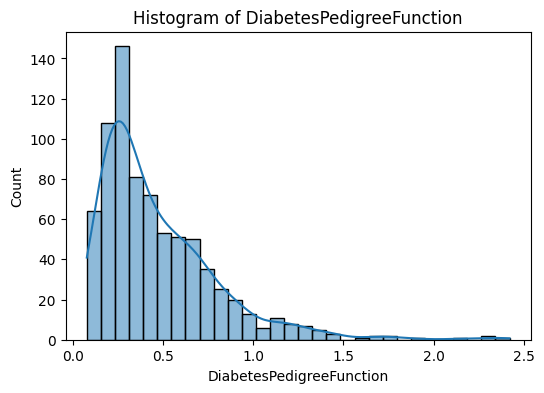

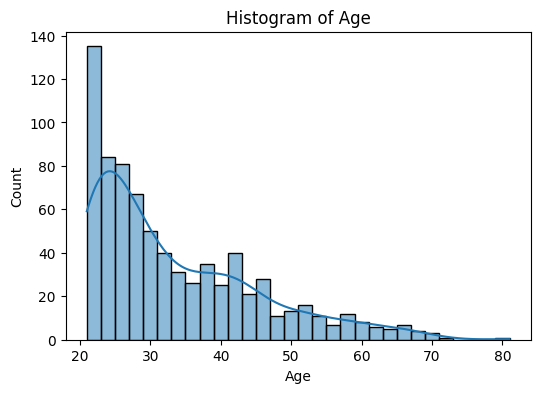

<Figure size 640x480 with 0 Axes>

In [19]:
# features histogram
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.savefig(f"{save_path}/02_histogram_{col}.svg")
    plt.show()

    output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)


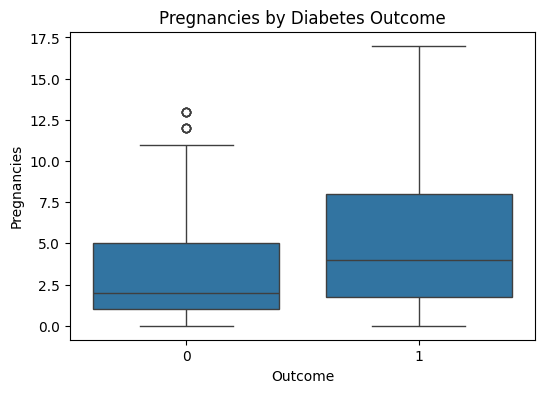

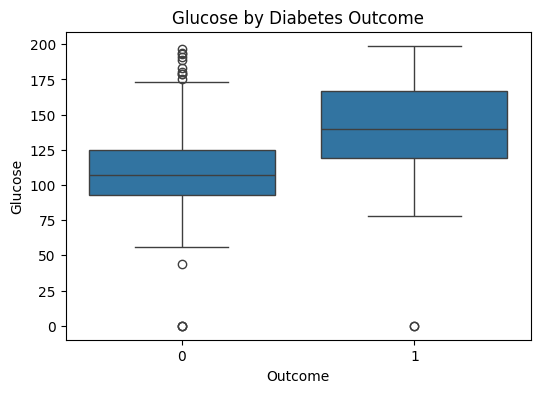

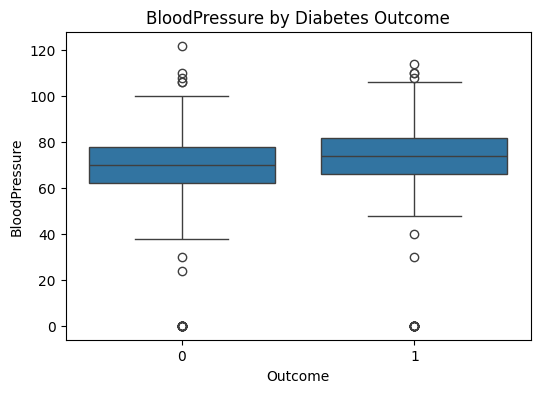

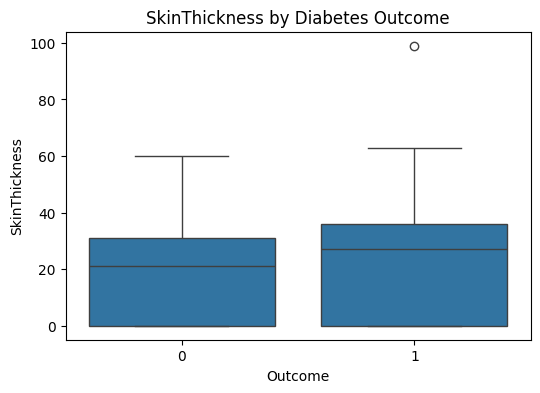

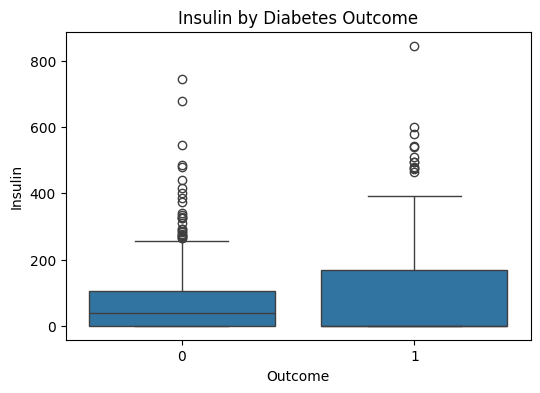

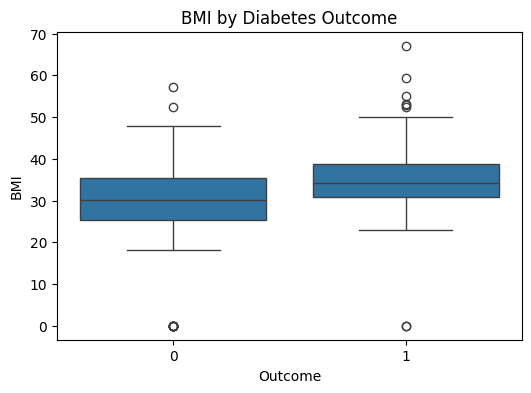

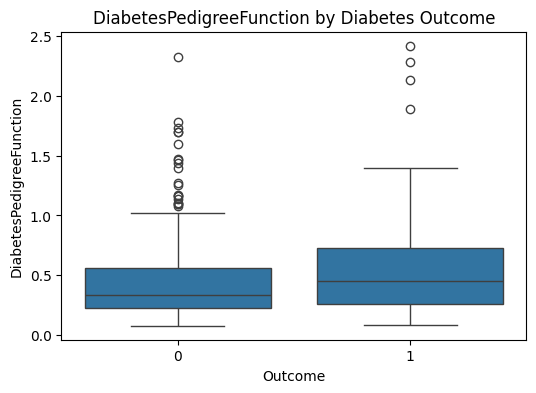

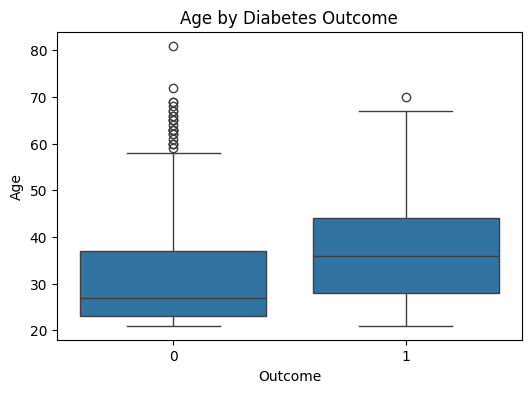

<Figure size 640x480 with 0 Axes>

In [20]:
# outcome boxplot
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} by Diabetes Outcome")
    plt.savefig(f"{save_path}/03_boxplot_{col}.svg")
    plt.show()
    output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)


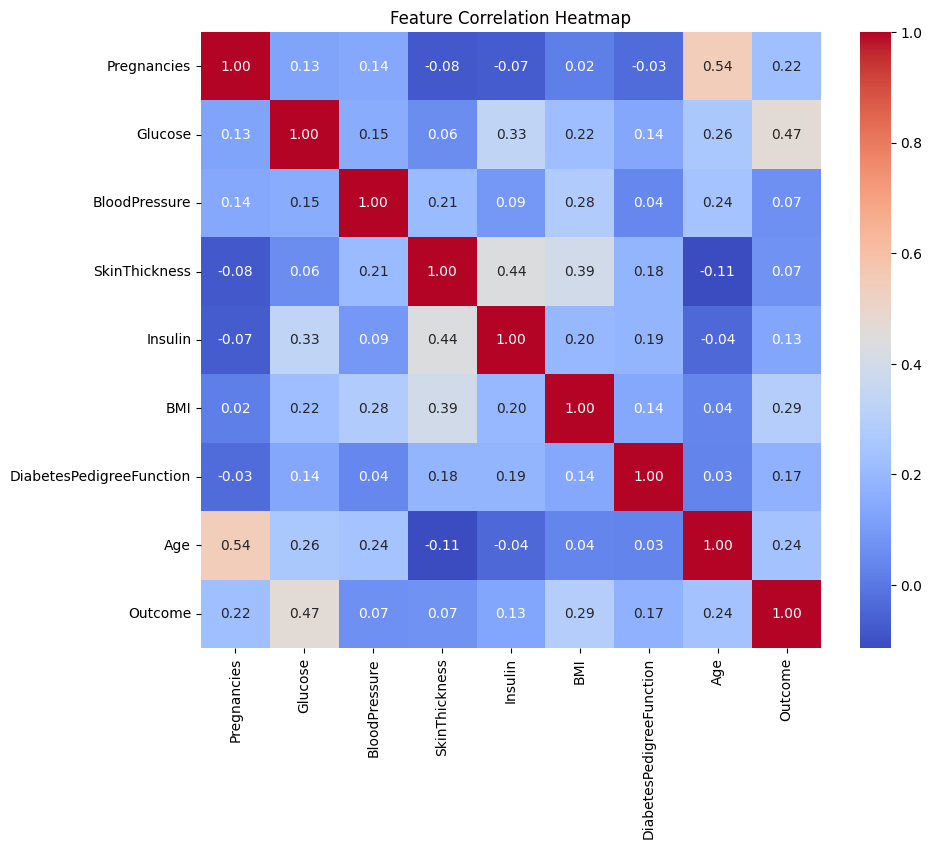

<Figure size 640x480 with 0 Axes>

In [21]:
# correlation heatmap
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig(f"{save_path}/04_correlation_heatmap.svg")
plt.show()

output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)


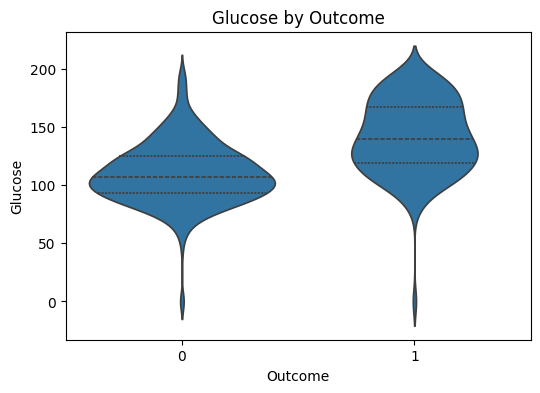

<Figure size 640x480 with 0 Axes>

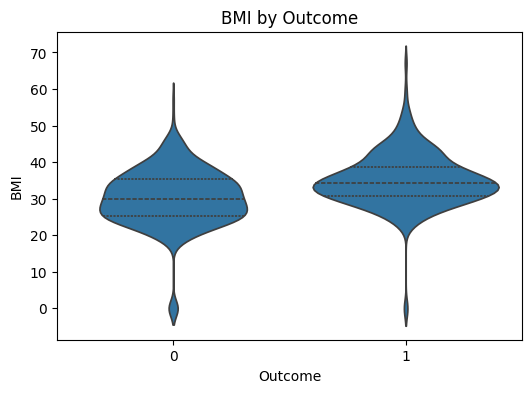

<Figure size 640x480 with 0 Axes>

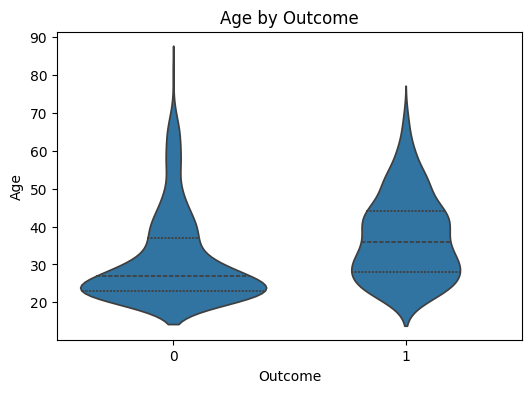

<Figure size 640x480 with 0 Axes>

In [22]:
# plots
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

for col in ['Glucose', 'BMI', 'Age']:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Outcome', y=col, data=df, inner='quartile')
    plt.title(f"{col} by Outcome")
    plt.savefig(f"{save_path}/05_violin_{col}.svg")
    plt.show()

    output_file = os.path.join(save_path, 'class_distribution.png')
    plt.savefig(output_file)


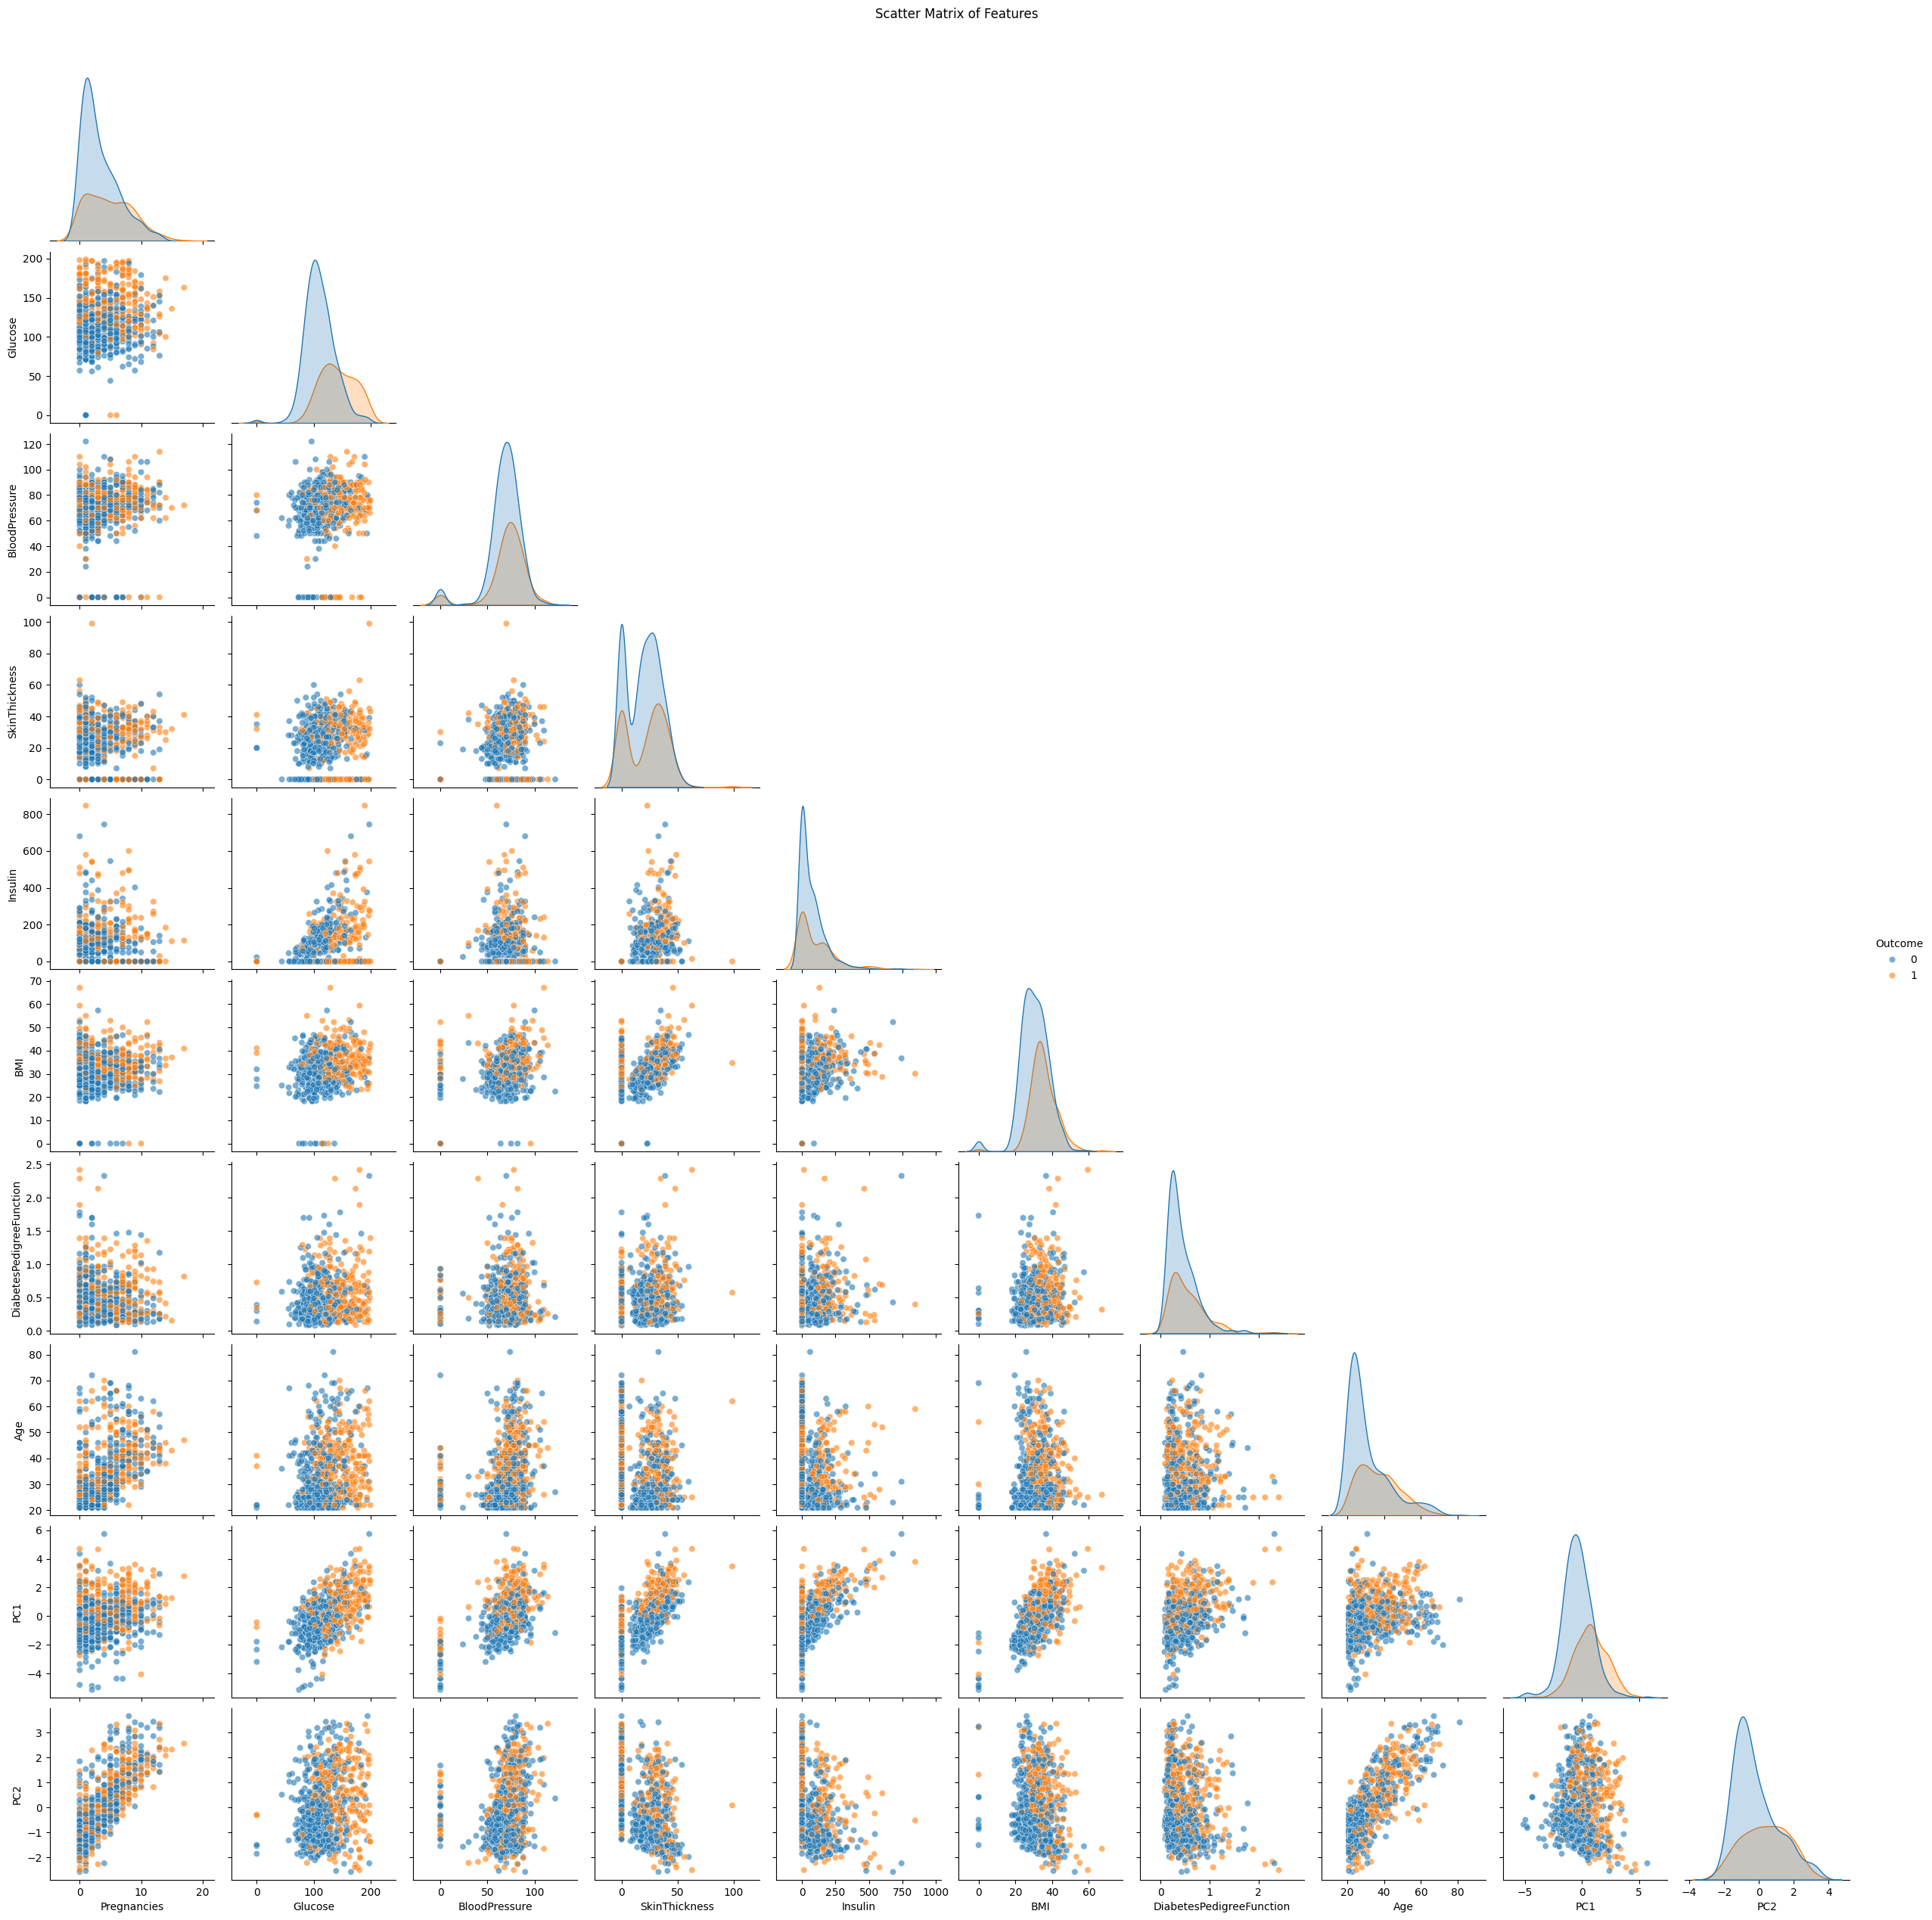

In [29]:
# pair
save_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

pairplot = sns.pairplot(df, hue='Outcome', corner=True, plot_kws={'alpha': 0.6})
pairplot.fig.suptitle("Scatter Matrix of Features", y=1.02)

pairplot.savefig(f"{save_path}/06_pairplot.png", bbox_inches='tight')
plt.show()

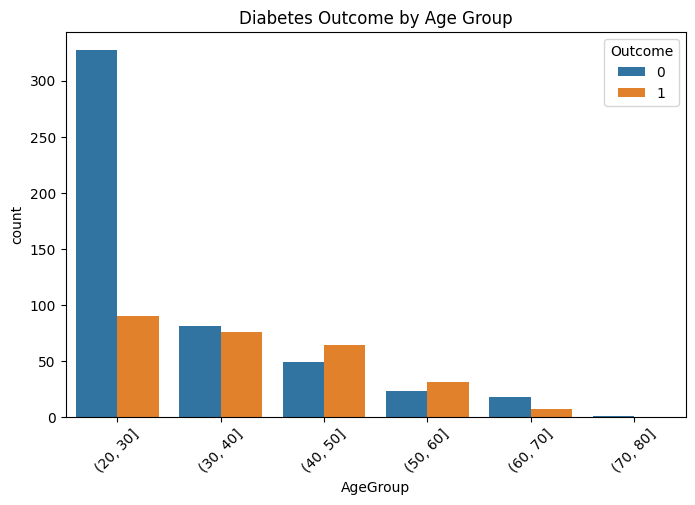

<Figure size 640x480 with 0 Axes>

In [24]:
# age - diabetes
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

bins = [20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup', hue='Outcome')
plt.title("Diabetes Outcome by Age Group")
plt.xticks(rotation=45)
plt.savefig(f"{save_path}/07_agegroup_outcome.svg")
plt.show()

output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)



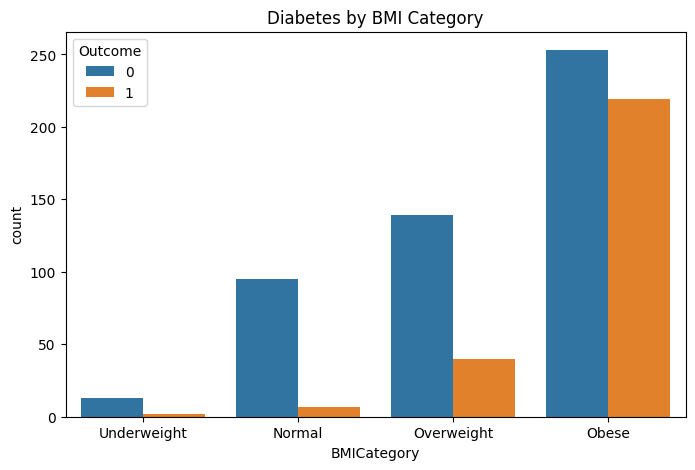

<Figure size 640x480 with 0 Axes>

In [25]:
# BMI and diabetes
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df['BMICategory'] = df['BMI'].apply(bmi_category)
plt.figure(figsize=(8, 5))
sns.countplot(x='BMICategory', hue='Outcome', data=df,
              order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title("Diabetes by BMI Category")
plt.savefig(f"{save_path}/08_bmi_category.svg")
plt.show()

output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)


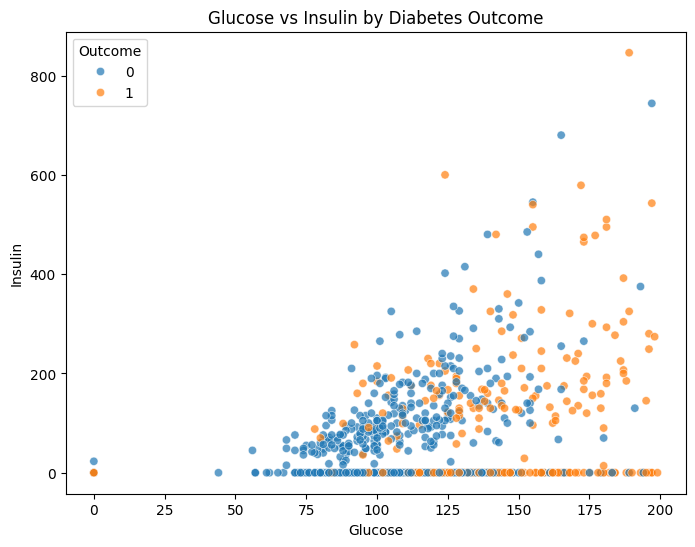

<Figure size 640x480 with 0 Axes>

In [26]:
#glucose - insulin
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome', alpha=0.7)
plt.title("Glucose vs Insulin by Diabetes Outcome")
plt.savefig(f"{save_path}/09_glucose_insulin.svg")
plt.show()

output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)

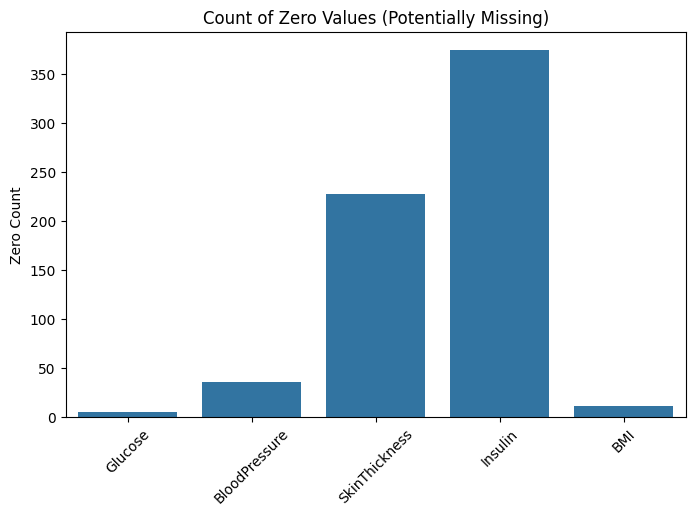

<Figure size 640x480 with 0 Axes>

In [27]:
# 0
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

zero_cols = [col for col in df.columns if (df[col] == 0).sum() > 0 and col not in ['Outcome', 'Pregnancies']]
zero_vals = {col: (df[col] == 0).sum() for col in zero_cols}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(zero_vals.keys()), y=list(zero_vals.values()))
plt.title("Count of Zero Values (Potentially Missing)")
plt.ylabel("Zero Count")
plt.xticks(rotation=45)
plt.savefig(f"{save_path}/10_zero_values.svg")
plt.show()

output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)


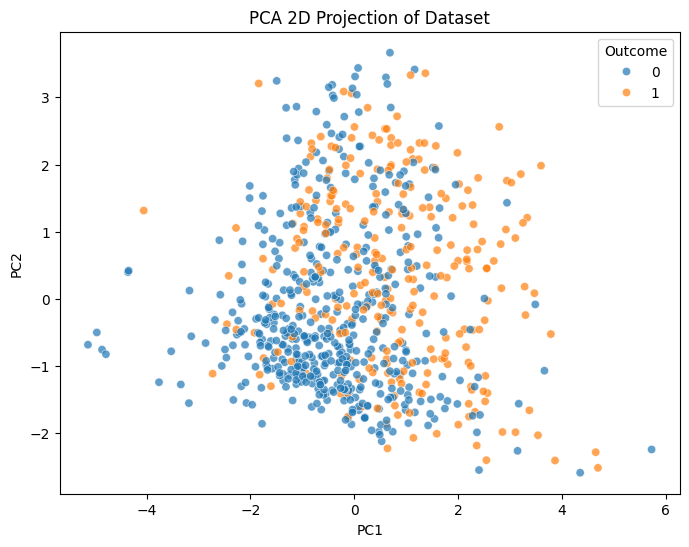

<Figure size 640x480 with 0 Axes>

In [28]:
#pca
ave_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Outcome', alpha=0.7)
plt.title("PCA 2D Projection of Dataset")
plt.savefig(f"{save_path}/11_pca_projection.svg")
plt.show()

output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)
